## Assignment 7

Choose six recent popular movies. Ask at least five people that you know (friends, family, classmates, imaginary friends) to rate each of these movies that they have seen on a scale of 1 to 5. There should be at least one movie that not everyone has seen! Take the results (observations) and store them somewhere (like a SQL database, or a .CSV file). Load the information into a pandas dataframe. Your solution should include Python and pandas code that accomplishes the following:

Load the ratings by user information that you collected into a pandas dataframe. 2. Show the average ratings for each user and each movie. 3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average ratings for each user and each movie.
Provide a text-based conclusion: explain what might be advantages and disadvantages of using normalized ratings instead of the actual ratings.
[Extra credit] Create another new pandas dataframe, with standardized ratings for each user. Once again, show the average ratings for each user and each movie. You may find this short article on normalization and standardization to be useful: http://bi-analytics.org/topic/9-standardization-vs-normalization/ Your deliverables should include your source data and a Jupyter Notebook, posted to GitHub. This is by design a very open ended assignment. A variety of reasonable approaches are acceptable. You may work in a small group on this assignment. If you work in a group, each group member should indicate who they worked with, and all group members should individually submit their assignment. Please start early, and do work that you would want to include in a “presentations portfolio” that you might share in a job interview with a potential employer! You are encouraged to share thoughts, ask, and answer clarifying questions in the “Week 7: Data Aggregation” forum. Here are some examples of recommender systems for movies: http://www.cnet.com/news/top-10-movie-recommendation-engines/

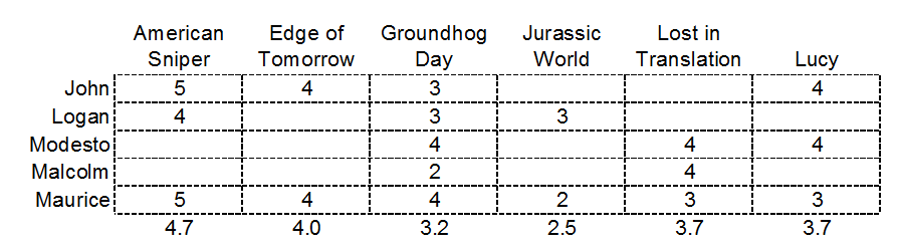

In [1]:
import pandas as pd
import numpy as np

### 1. Load the ratings by user information that you collected into a pandas dataframe.

In [2]:
ratings = pd.read_csv('https://raw.githubusercontent.com/pdelro/IS362/main/Week%207/movie_ratings.csv', index_col = 0, header = 0)
ratings

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep
PJ,5,4.0,4.0,4.0,2.0,4.0
Nikki,4,4.0,5.0,NaN,NaN,4.0
Trish,5,4.0,4.0,4.0,3.0,NaN
Chris,3,NaN,5.0,5.0,3.0,3.0
JB,5,NaN,NaN,4.0,NaN,NaN


### 2. Show the average ratings for each user and each movie.

In [3]:
ratings_copy = ratings.copy()
ratings_copy['Average User Rating'] = ratings_copy.mean(axis = 1, skipna = True).round(decimals = 1)
ratings_copy

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,5,4.0,4.0,4.0,2.0,4.0,3.8
Nikki,4,4.0,5.0,NaN,NaN,4.0,4.2
Trish,5,4.0,4.0,4.0,3.0,NaN,4.0
Chris,3,NaN,5.0,5.0,3.0,3.0,3.8
JB,5,NaN,NaN,4.0,NaN,NaN,4.5


In [4]:
ratings_copy.loc['Average Movie Rating'] = ratings_copy.mean(axis = 0, skipna = True).round(decimals = 1)
ratings_copy

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,5.0,4.0,4.0,4.0,2.0,4.0,3.8
Nikki,4.0,4.0,5.0,NaN,NaN,4.0,4.2
Trish,5.0,4.0,4.0,4.0,3.0,NaN,4.0
Chris,3.0,NaN,5.0,5.0,3.0,3.0,3.8
JB,5.0,NaN,NaN,4.0,NaN,NaN,4.5
Average Movie Rating,4.4,4.0,4.5,4.2,2.7,3.7,4.1


### 3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average ratings for each user and each movie.

In [5]:
normalized = ratings.copy()
normalized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep
PJ,5,4.0,4.0,4.0,2.0,4.0
Nikki,4,4.0,5.0,NaN,NaN,4.0
Trish,5,4.0,4.0,4.0,3.0,NaN
Chris,3,NaN,5.0,5.0,3.0,3.0
JB,5,NaN,NaN,4.0,NaN,NaN


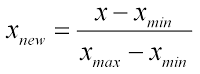

In [6]:
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())
normalized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep
PJ,1.0,NaN,0.0,0.0,0.0,1.0
Nikki,0.5,NaN,1.0,NaN,NaN,1.0
Trish,1.0,NaN,0.0,0.0,1.0,NaN
Chris,0.0,NaN,1.0,1.0,1.0,0.0
JB,1.0,NaN,NaN,0.0,NaN,NaN


In [7]:
normalized['Average User Rating'] = normalized.mean(axis = 1, skipna = True).round(decimals = 1)
normalized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,1.0,NaN,0.0,0.0,0.0,1.0,0.4
Nikki,0.5,NaN,1.0,NaN,NaN,1.0,0.8
Trish,1.0,NaN,0.0,0.0,1.0,NaN,0.5
Chris,0.0,NaN,1.0,1.0,1.0,0.0,0.6
JB,1.0,NaN,NaN,0.0,NaN,NaN,0.5


In [8]:
normalized.loc['Average Movie Rating'] = normalized.mean(axis = 0, skipna = True).round(decimals = 1)
normalized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,1.0,NaN,0.0,0.0,0.0,1.0,0.4
Nikki,0.5,NaN,1.0,NaN,NaN,1.0,0.8
Trish,1.0,NaN,0.0,0.0,1.0,NaN,0.5
Chris,0.0,NaN,1.0,1.0,1.0,0.0,0.6
JB,1.0,NaN,NaN,0.0,NaN,NaN,0.5
Average Movie Rating,0.7,NaN,0.5,0.2,0.7,0.7,0.6


### 4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using normalized ratings instead of the actual ratings.

Since normalization rescaled the ratings to a 0-1 range, it's more obvious how high or low each user rated a movie relative to one another. The disadvantages are that the results aren't necessarily more accurate. For example, looking at the movie Turning Red, using the normalization formula resulted in NaN because the users that had rated the movie gave the same rating. Even though it was a fairly high rating, the normalized rating didn't show that.

### [Extra credit] Create another new pandas dataframe, with standardized ratings for each user. Once again, show the average ratings for each user and each movie.

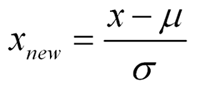

In [9]:
standardized = ratings.copy()
standardized = (standardized - standardized.mean())/standardized.std()
standardized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep
PJ,0.670820,NaN,-0.866025,-0.5,-1.154701,0.577350
Nikki,-0.447214,NaN,0.866025,NaN,NaN,0.577350
Trish,0.670820,NaN,-0.866025,-0.5,0.577350,NaN
Chris,-1.565248,NaN,0.866025,1.5,0.577350,-1.154701
JB,0.670820,NaN,NaN,-0.5,NaN,NaN


In [10]:
standardized['Average User Rating'] = standardized.mean(axis = 1, skipna = True).round(decimals = 1)
standardized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,0.670820,NaN,-0.866025,-0.5,-1.154701,0.577350,-0.3
Nikki,-0.447214,NaN,0.866025,NaN,NaN,0.577350,0.3
Trish,0.670820,NaN,-0.866025,-0.5,0.577350,NaN,-0.0
Chris,-1.565248,NaN,0.866025,1.5,0.577350,-1.154701,0.0
JB,0.670820,NaN,NaN,-0.5,NaN,NaN,0.1


In [11]:
standardized.loc['Average Movie Rating'] = standardized.mean(axis = 0, skipna = True).round(decimals = 1)
standardized

,Encanto,Turning Red,The Lost City,The Batman,Master,Josep,Average User Rating
PJ,0.670820,NaN,-0.866025,-0.5,-1.154701,0.577350,-0.3
Nikki,-0.447214,NaN,0.866025,NaN,NaN,0.577350,0.3
Trish,0.670820,NaN,-0.866025,-0.5,0.577350,NaN,-0.0
Chris,-1.565248,NaN,0.866025,1.5,0.577350,-1.154701,0.0
JB,0.670820,NaN,NaN,-0.5,NaN,NaN,0.1
Average Movie Rating,-0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.0


I find that the standardized ratings aren't as helpful because even though I understand how to read them, I would rather look at the actual ratings. It makes sense for a computer but requires you to adjust your thinking to recognize that the average is 0 and to compare the ratings relative to that.
